In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 读取图像
img = cv2.imread('./2.jpg', 0)
img1 = cv2.imread('./2.jpg')

In [5]:
# 直方图函数
def equalizeHist(image):
    # 计算图像的直方图
    hist, bins = np.histogram(image.flatten(), 256, [0,256])
    
    # 计算累积分布函数（CDF）
    cdf = hist.cumsum()
    
    # 归一化CDF
    cdf_normalized = cdf * hist.max() / cdf.max()
    
    # 使用CDF进行直方图均衡化
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf_normalized).reshape(image.shape)
    
    return image_equalized.astype(np.uint8)

equ = cv2.equalizeHist(img)

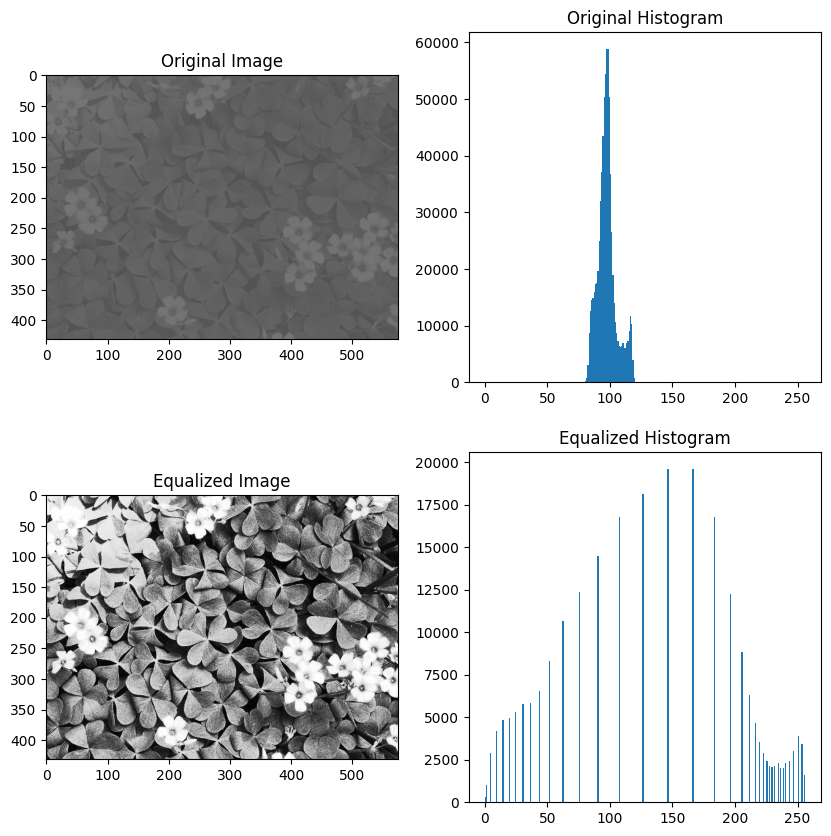

In [6]:
# 绘制处理前后图像及直方图
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(img1, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 1].hist(img1.ravel(), 256, [0, 256])
axs[0, 1].set_title('Original Histogram')
axs[1, 0].imshow(equ, cmap='gray')
axs[1, 0].set_title('Equalized Image')
axs[1, 1].hist(equ.ravel(), 256, [0, 256])
axs[1, 1].set_title('Equalized Histogram')
plt.show()